# SP500 data 
###### Author: Mokhtar Z. Alaya <alayaelm@utc.fr> 

In [9]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu

import sys
sys.path.append('/volper/users/alayaelm/Documents/git/wasslsp')

from src.utils import *
from src.kernels import Kernel

init_notebook_mode(connected=True) ## plotly init

import os
path_data = '/volper/users/alayaelm/Documents/git/wasslsp/data/'

In [10]:
print("MT02")

MT02


In [11]:
df_sp500 = pd.read_csv(path_data + 'sp500_data.csv')# 'sp500.csv')

In [12]:
df_sp500.shape, 

((8372, 5),)

In [13]:
df_sp500.head()

,Date,SP500,T10yAaa.lag,AaaBaa.lag,T10yT1y.lag
0,1986-01-03,0.006136,0.88,1.46,1.40
1,1986-01-06,-0.001091,0.87,1.43,1.40
2,1986-01-07,0.014843,0.87,1.42,1.43
3,1986-01-08,-0.027647,0.91,1.44,1.35
4,1986-01-09,-0.008984,0.76,1.45,1.40


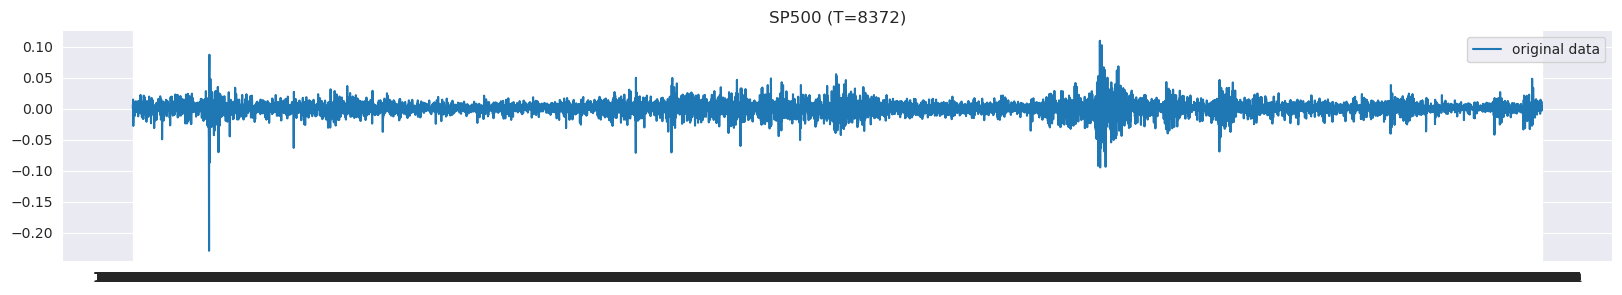

In [14]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df_sp500['Date'], df_sp500['SP500'], label="original data")
# plt.plot(df_sp500['Date'], df_sp500['SP500'].diff(), label="diff")
plt.legend()
plt.title("SP500 (T=8372)")
plt.show()

In [15]:
dates = df_sp500['Date'].copy()
dates = pd.to_datetime(dates, format="%Y-%m-%d")
# dates

In [16]:
T = df_sp500.shape[0]
d = 1

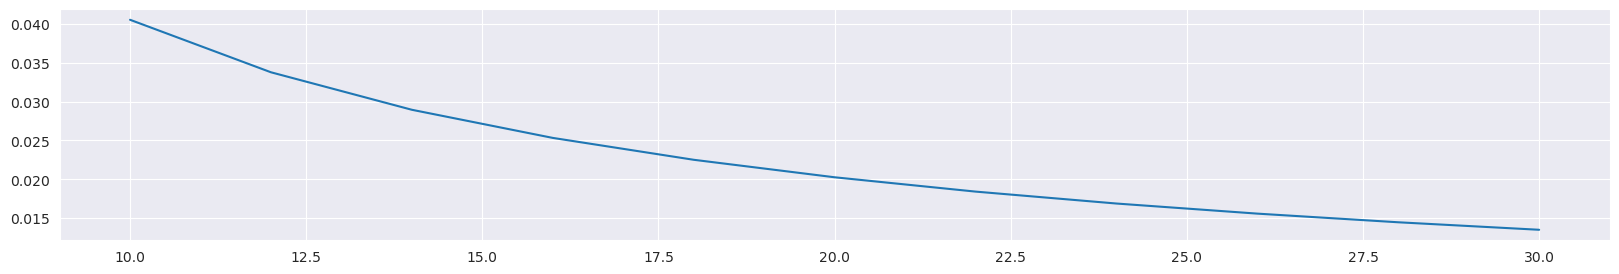

In [25]:
C = np.array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])
bandwidth = T **(-0.4 / (2*(d+1))) / C
plt.plot(C, bandwidth, label="Bandwidth")

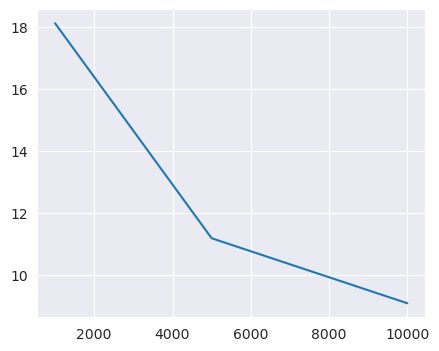

In [39]:
C = 70
T = np.array([1000, 5000, 10000])

xi = 0.4 / (2 * (d + 1))
lambda_ = 1 / 12

# bandwidth = T **(-0.4 / (d+1)) / C
bandwidth = lambda_ * T **(-xi) 
plt.plot(T, 1 / (T**(1/2) * bandwidth**2), label="Bandwidth")

In [ ]:
times_t = [4000, 4250, 4500, 4750, 5000, 5250, 5500, 5750] 


In [17]:

T = df_sp500.shape[0]
n_replications = 3
d = 1


X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    sigma_star = lambda u: 0.01
    t = 1
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = df_sp500['SP500'].values[t] + sigma_star(t/T) * epsilon[t]
        X[t] = [X_tvar_2[t-1]]
        t += 1
        
    X_dict[str(replication)] = X
    X_tvar_2_replications[replication] = X_tvar_2

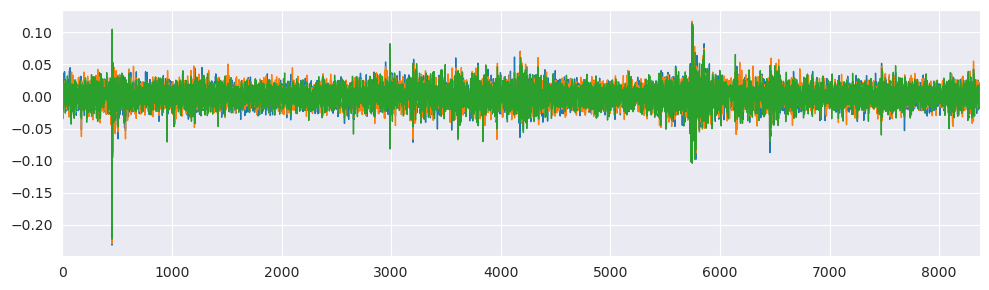

In [18]:
plt.rcParams["figure.figsize"] = (10,3)

u_var = np.linspace(0., 1., T)

for replication in range(n_replications):
    plt.plot(X_tvar_2_replications[replication], lw=1)
    # plt.plot(X_tvar_2_replications_u_var[replication], lw=2)
    # plt.plot(X_tvar_2_mean)
    # plt.xticks(np.arange(0, T+1, 200, dtype=int))
    plt.xlim(0, T)
    #plt.title(r'$Y_{t,T} = m^\star(\frac{t}{T}, X_{t,T}) + \varepsilon_{t,T}$')
    #plt.legend()
    plt.tight_layout()
    plt.grid(True)
    #plt.savefig(path_fig+"mean_funciton", dpi=150)
plt.show()

In [19]:
times_t = [4000, 4250, 4500, 4750, 5000, 5250, 5500, 5750] 
times_T = [T]
times_sigma = [10**-1, 10**-2, 10**-3, 10**-4]
n_replications = [10, 20, 30]
d = 1


In [20]:
X_tvar_2 = {}
X_tvar_2_replications = {}
X_dict = {}

for sigma_ in times_sigma:
    X_dict[f"sigma:{sigma_}"] = {}
    
    for rep in n_replications:
        X_tvar_2_replications[f"sigma:{sigma_}_rep:{rep}"] = np.zeros((rep, T))
        X_dict[f"sigma:{sigma_}_rep:{rep}"] = {}


In [21]:
import torch
import scipy as scp
import matplotlib
from matplotlib import cm
from scipy.stats import wasserstein_distance

In [22]:
for T in times_T:
    u_var = np.linspace(0., 1., T)

    for sigma_ in times_sigma:
        for rep in n_replications:
            for replication in range(rep):
                sigma_star = lambda u: sigma_
                t = 1
                epsilon = np.random.normal(0, sigma_, size=(T))
                X = np.zeros((T, d))
                X_tvar_2_T = np.zeros(T)
                
                while t <= T-1:
                    X_tvar_2_T[t] = df_sp500['SP500'].values[t] + sigma_star(t/T) * epsilon[t]
                    X[t] = [X_tvar_2_T[t-1]]
                    t += 1

                X_tvar_2_replications[f"sigma:{sigma_}_rep:{rep}"][replication] = X_tvar_2_T
                X_dict[f"sigma:{sigma_}_rep:{rep}"][str(replication)] = X


In [23]:
X_tvar_2 = {}

for t in times_t:
    for sigma_ in times_sigma:
        for rep in n_replications:
            X_tvar_2[f"t:{t}_sigma:{sigma_}_rep:{rep}"] = {}


In [24]:

for t in times_t:
    for sigma_ in times_sigma:
        for rep in n_replications:
            X_tvar_2[f"t:{t}_sigma:{sigma_}_rep:{rep}"] = []


for t in times_t:
    for rep in n_replications:
        for replication in range(rep):
            for sigma_ in times_sigma:
                z = X_tvar_2_replications[f"sigma:{sigma_}_rep:{rep}"][replication][t-1]
                X_tvar_2[f"t:{t}_sigma:{sigma_}_rep:{rep}"].append(z)


for t in times_t:
    for sigma_ in times_sigma:
        for rep in n_replications:
            X_tvar_2[f"t:{t}_sigma:{sigma_}_rep:{rep}"] = np.array(X_tvar_2[f"t:{t}_sigma:{sigma_}_rep:{rep}"])


In [25]:
plt.rcParams["figure.figsize"] = (5, 4)

norm_X_tvar_2 = {}
for t in times_t:
    for sigma_ in times_sigma:
        for rep in n_replications:
            norm_X_tvar_2[f"t:{t}_sigma:{sigma_}_rep:{rep}"] = scp.stats.norm.cdf(X_tvar_2[f"t:{t}_sigma:{sigma_}_rep:{rep}"])


# space_kernel = "gaussian"; time_kernel = "uniform"

In [26]:
space_kernel = "gaussian"  # "silverman"
time_kernel = "uniform"  # "tricube"
xi = 0.4 / (2 * (d + 1))
lambda_ = 1 / 12

T = df_sp500.shape[0]
gaussian_kernel = {}
gaussian_weights = {}

for t in times_t:
    for sigma_ in times_sigma:
        for rep in n_replications:
            gaussian_weights[f"t:{t}_sigma:{sigma_}_rep:{rep}"] = {}

for sigma_ in times_sigma:
    bandwidth = lambda_ * (T ** (-xi))
    gaussian_kernel[f"sigma:{sigma_}"] = Kernel(T=T, bandwidth=bandwidth, space_kernel=space_kernel, time_kernel=time_kernel)


In [27]:
gaussian_kernel

{'sigma:0.1': Kernel(T=8372, bandwidth=0.03377037101411927, time_kernel='uniform'),
 'sigma:0.01': Kernel(T=8372, bandwidth=0.03377037101411927, time_kernel='uniform'),
 'sigma:0.001': Kernel(T=8372, bandwidth=0.03377037101411927, time_kernel='uniform'),
 'sigma:0.0001': Kernel(T=8372, bandwidth=0.03377037101411927, time_kernel='uniform')}

In [28]:
for rep in n_replications:
    for replication in range(rep):
        for t in times_t:
            for sigma_ in times_sigma:
                gaussian_weights[f"t:{t}_sigma:{sigma_}_rep:{rep}"][str(replication)] = \
                gaussian_kernel[f"sigma:{sigma_}"].fit(X_dict[f"sigma:{sigma_}_rep:{rep}"][str(replication)], t)


In [29]:
n_replications

[10, 20, 30]

In [30]:
gaussian_weights_tensor = {}  # Initialize the tensor dictionary

for i_t in range(len(times_t)):
    for i_sigma in range(len(times_sigma)):
        for rep in n_replications:
            gaussian_weights_tensor[f"t:{times_t[i_t]}_sigma:{times_sigma[i_sigma]}_rep:{rep}"] = {}

for i_t in range(len(times_t)):
    for i_sigma in range(len(times_sigma)):  
        for rep in n_replications:
            for replication in range(rep):
                # Assign the corresponding gaussian weights for each replication and rep
                gaussian_weights_tensor[f"t:{times_t[i_t]}_sigma:{times_sigma[i_sigma]}_rep:{rep}"][str(replication)] = \
                gaussian_weights[f"t:{times_t[i_t]}_sigma:{times_sigma[i_sigma]}_rep:{rep}"][str(replication)]


In [31]:
empirical_cds = {}

for t in times_t:
    for sigma_ in times_sigma:
        for rep in n_replications:
            empirical_cds[f"t:{t}_sigma:{sigma_}_rep:{rep}"] = scp.stats.norm.cdf(X_tvar_2[f"t:{t}_sigma:{sigma_}_rep:{rep}"])


In [32]:
def eval_univariate(x, weights):
        """Inner function for ECDF of one variable."""
        sorter = x.argsort()
        x = x[sorter]
        weights = weights[sorter]
        y = weights.cumsum()

        # if self.stat in ["percent", "proportion"]:
        y = y / y.max()
        # if self.stat == "percent":
            # y = y * 100

        # x = np.r_[-np.inf, x]
        # y = np.r_[0, y]
        x = np.r_[x]
        y = np.r_[y]

        # if self.complementary:
            # y = y.max() - y

        return y, x

In [33]:
x_rep = {} 
y_rep = {} 
wasserstein_distances = {}

for t in times_t:
    for sigma_ in times_sigma:
        for rep in n_replications:
            x_rep[f"t:{t}_sigma:{sigma_}_rep:{rep}"] = np.zeros((rep, T))
            y_rep[f"t:{t}_sigma:{sigma_}_rep:{rep}"] = np.zeros((rep, T))
            wasserstein_distances[f"t:{t}_sigma:{sigma_}_rep:{rep}"] = {}


for rep in n_replications:
    for replication in range(rep): 
        for t in times_t:
            for sigma_ in times_sigma:
                y, x = eval_univariate(
                    X_tvar_2_replications[f"sigma:{sigma_}_rep:{rep}"][replication], 
                    gaussian_weights_tensor[f"t:{t}_sigma:{sigma_}_rep:{rep}"][str(replication)]
                )
                
                x_rep[f"t:{t}_sigma:{sigma_}_rep:{rep}"][replication] = x
                y_rep[f"t:{t}_sigma:{sigma_}_rep:{rep}"][replication] = y
                
                distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_replications[f"sigma:{sigma_}_rep:{rep}"][replication]))
                wasserstein_distances[f"t:{t}_sigma:{sigma_}_rep:{rep}"][str(replication)] = distance


In [34]:
wass_distances_all_replications = {}


for t in times_t:
    for sigma_ in times_sigma:
        for rep in n_replications:
            wass_distances_all_replications[f"t:{t}_sigma:{sigma_}_rep:{rep}"] = []


for t in times_t:
    for sigma_ in times_sigma:
        for rep in n_replications:
            for replication in range(rep):
                
                wass_distances_all_replications[f"t:{t}_sigma:{sigma_}_rep:{rep}"].append(
                    wasserstein_distances[f"t:{t}_sigma:{sigma_}_rep:{rep}"][str(replication)]
                )


In [35]:
plt.rcParams["figure.figsize"] = (10, 3)
wass_distances_empirical_meanNW = {}


for t in times_t:
    for sigma_ in times_sigma:
        for rep in n_replications:
            
            wass_distances_empirical_meanNW[f"t:{t}_sigma:{sigma_}_rep:{rep}"] = wasserstein_distance(
                empirical_cds[f"t:{t}_sigma:{sigma_}_rep:{rep}"], y_rep[f"t:{t}_sigma:{sigma_}_rep:{rep}"].mean(axis=0)
            )


In [36]:
wass_distances_empirical_meanNW

{'t:4000_sigma:0.1_rep:10': 0.21261891021733434,
 't:4000_sigma:0.1_rep:20': 0.21317299874641632,
 't:4000_sigma:0.1_rep:30': 0.21293607070549883,
 't:4000_sigma:0.01_rep:10': 0.18500609024843465,
 't:4000_sigma:0.01_rep:20': 0.184989771473366,
 't:4000_sigma:0.01_rep:30': 0.18494103546963855,
 't:4000_sigma:0.001_rep:10': 0.18499541834510103,
 't:4000_sigma:0.001_rep:20': 0.18499519247961765,
 't:4000_sigma:0.001_rep:30': 0.1849949041171577,
 't:4000_sigma:0.0001_rep:10': 0.1849987304042552,
 't:4000_sigma:0.0001_rep:20': 0.1849988746856568,
 't:4000_sigma:0.0001_rep:30': 0.184998864282205,
 't:4250_sigma:0.1_rep:10': 0.2200790586765493,
 't:4250_sigma:0.1_rep:20': 0.22187952501915198,
 't:4250_sigma:0.1_rep:30': 0.2219629143801502,
 't:4250_sigma:0.01_rep:10': 0.19592945188177582,
 't:4250_sigma:0.01_rep:20': 0.1958610148400496,
 't:4250_sigma:0.01_rep:30': 0.1959232113722649,
 't:4250_sigma:0.001_rep:10': 0.19595638049923994,
 't:4250_sigma:0.001_rep:20': 0.19595666347661428,
 't:42

In [37]:
plt.rcParams["figure.figsize"] = (10, 3)
wass_times_t = {}


for t in times_t:
    for rep in n_replications:
        wass_times_t[f"t:{t}_rep:{rep}"] = []


for t in times_t:
    for sigma_ in times_sigma:
        for rep in n_replications:
            
            wass_times_t[f"t:{t}_rep:{rep}"].append(wass_distances_empirical_meanNW[f"t:{t}_sigma:{sigma_}_rep:{rep}"])


ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

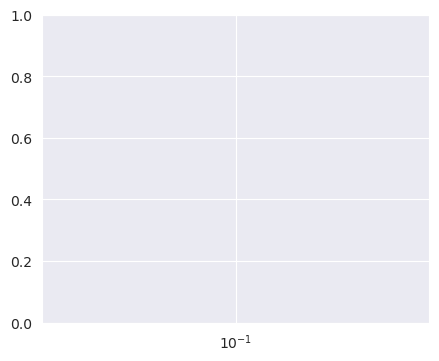

In [38]:
plt.rcParams["figure.figsize"] = (5, 4)
colors = plt.cm.Set1(np.linspace(0, .5, 8))
markers = ['o', '>', 'D', 'X', "p", 's', 'P', '*']
times_sigma_cat = [r'$10^{-1}$', r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$', r'$10^{-5}$']


for rep in n_replications:
    plt.figure()  
    for i, t in zip(range(len(times_t)), times_t):
        plt.plot(times_sigma_cat, wass_times_t[f"t:{t}_rep:{rep}"], label=f"t:{t}", color=colors[i], marker=markers[i], markersize=6, lw=2)
    
    plt.ylim(0.17, 0.4)
    plt.xlabel(r'$\sigma$')
    plt.ylabel("Wasserstein distance")
    plt.title(f"Wasserstein Distance for n_replications={rep}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    
    # plt.savefig(f"wass_distance_{rep}.png", dpi=150)
    
    plt.show()  
